# Pie charts describing the dataset in Fig 1B and Fig 1C

In [1]:
import os
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
data_dir = './data'

In [4]:
# Annotations colors
color_data = {
    'Primary' : '#ffd42aff',
    'Metastasis' : '#d4a800ff',    
    'Pediatric' : '#aaccffff',
    'Adult' : '#6798e4ff'
}

In [5]:
# Reformat cancer type long names for publication
ctype_long_name = {
    'AML': 'Acute Myeloid Leukemia',
    'ALL': 'Acute lymphoblastic leukemia',
    'ACC': 'Adrenocortical Carcinoma',
    'AN': 'Anal Cancer',
    'BCC': 'Basal Cell Carcinoma',
    'BILIARY_TRACT': 'Biliary Tract Cancer',
    'BLADDER_URI': 'Bladder/Urinary Tract Cancer',
    'BONE_SOFT_TISSUE': 'Bone/Soft Tissue Cancer',
    'BOWEL': 'Bowel Cancer',
    'BRAIN': 'CNS/Brain Cancer',
    'CERVIX': 'Cervical Cancer',
    'COADREAD': 'Colorectal Adenocarcinoma',
    'SKCM': 'Cutaneous Melanoma',
    'CSCC': 'Cutaneous Squamous Cell Carcinoma',
    'UCEC': 'Endometrial Carcinoma',
    'EPM': 'Ependymoma',
    'ES': 'Esophageal Cancer',
    'ESOPHA_STOMACH': 'Esophagus/Stomach',
    'GBM': 'Glioblastoma Multiforme',
    'HEAD_NECK': 'Head and Neck',
    'HGGNOS': 'High-Grade Glioma, NOS',
    'BRCA': 'Invasive Breast Carcinoma',
    'KIDNEY': 'Kidney Cancer',
    'LIVER': 'Liver Cancer',
    'LGGNOS': 'Low-Grade Glioma, NOS',
    'LUNG': 'Lung Cancer',
    'LNET': 'Lung Neuroendocrine Tumor',
    'LNM': 'Lymphoid Neoplasm',
    'MBL': 'Medulloblastoma',
    'MNM': 'Myeloid Neoplasm',
    'MPN': 'Myeloproliferative Neoplasms',
    'NBL': 'Neuroblastoma',
    'NHL': 'Non-Hodgkin Lymphoma',
    'NSCLC': 'Non-Small Cell Lung Cancer',
    'ODG': 'Oligodendroglioma',
    'OV': 'Ovarian Cancer',
    'PANCREAS': 'Pancreatic Cancer',
    'PAST': 'Pilocytic Astrocytoma',
    'PLMESO': 'Pleural Mesothelioma',
    'PROSTATE': 'Prostate Cancer',
    'RBL': 'Retinoblastoma',
    'SKIN': 'Skin Cancer',
    'SBC': 'Small Bowel Cancer',
    'SBNET': 'Small Bowel Neuroendocrine Tumor',
    'SCLC': 'Small Cell Lung Cancer',
    'ST': 'Stomach Cancer',
    'THYROID': 'Thyroid Cancer',
    'VULVA': 'Vulva Cancer'
}

#### Load data

This input data corresponds to Datasets EV1 and EV2

In [6]:
# Cancer types (we will only use Level A cancer types)
ctype_f = os.path.join(data_dir, 'EV2_table.txt')
ctype_df = pd.read_csv(ctype_f, sep='\t', header=0)
ctype_levelA_df = ctype_df.loc[ctype_df['LEVEL_ANALYSIS'] == 'A'].copy()
ctype_levelA_df.head(3)

,CANCER_TYPE,CANCER_TYPE_LONG,LEVEL_ONCOTREE,LEVEL_ANALYSIS,SAMPLES,COHORTS,MUTATIONS_TOTAL,MUTATIONS_SNV,MUTATIONS_MNV,MUTATIONS_INS,MUTATIONS_DEL
0,ACC,Adrenocortical Carcinoma (ACC),2,A,20,D_ACC,16649,16614,0,26,9
1,ALL,Acute lymphoblastic leukemia (ALL),3,A,278,D_ALL,154660,154095,198,145,222
3,EPM,Ependymoma (EPM),3,A,39,D_EPD,9158,9114,0,34,10


In [7]:
# Cohorts 
cohort_f = os.path.join(data_dir, 'EV1_table.txt')
cohort_df = pd.read_csv(cohort_f, sep='\t', header=0)
cohort_df.head(3)

,COHORT,COHORT_MANUSCRIPT_LONG_NAME,SOURCE,PLATFORM,REFERENCE_DOI,TYPE,TREATED,AGE,SAMPLES,MUTATIONS_TOTAL,...,LEVEL_A_LONG,LEVEL_A,LEVEL_B_LONG,LEVEL_B,LEVEL_0,LEVEL_1,LEVEL_2,LEVEL_3,LEVEL_4,LEVEL_5
0,D_ACC,Adrenocortical carcinomas (St. Jude Children's...,STJUDE,WGS,10.1038/ncomms7302,Primary,Untreated,Pediatric,20,16649,...,Adrenocortical Carcinoma (ACC),ACC,None,None,PANCANCER,Adrenal Gland (ADRENAL_GLAND),Adrenocortical Carcinoma (ACC),NaN,NaN,NaN
1,D_ALL,Acute lymphoblastic leukemias (St. Jude Childr...,STJUDE,WGS,10.1038/ncomms7604,Primary,Untreated,Pediatric,278,154660,...,Acute lymphoblastic leukemia (ALL),ALL,Lymphoid Neoplasm (LNM),LNM,PANCANCER,Lymphoid (LYMPH),Lymphoid Neoplasm (LNM),Acute lymphoblastic leukemia (ALL),NaN,NaN
2,PCAWG_WGS_MYELOID_AML,Acute myeloid leukemias (PCAWG),PCAWG,WGS,10.1101/162784,Primary,Untreated,Adult,13,18413,...,Acute Myeloid Leukemia (AML),AML,Myeloid Neoplasm (MNM),MNM,PANCANCER,Myeloid (MYELOID),Myeloid Neoplasm (MNM),Acute Myeloid Leukemia (AML),NaN,NaN


## Panel 1B

In [8]:
# Cancer types color palette
palette = sns.color_palette("tab20", 17).as_hex()

In [9]:
# Select top 16 cancer types with largest number of samples
ctype_levelA_df.sort_values(by='SAMPLES', ascending=False, inplace=True)
ctypes_to_plot = ctype_levelA_df[:16]['CANCER_TYPE'].tolist()
ctypes_to_plot

['NHL',
 'BRCA',
 'PROSTATE',
 'COADREAD',
 'NSCLC',
 'PANCREAS',
 'BONE_SOFT_TISSUE',
 'LIVER',
 'SKCM',
 'KIDNEY',
 'ALL',
 'NBL',
 'OV',
 'ES',
 'MBL',
 'BLADDER_URI']

In [10]:
# Load data 
data_dict = defaultdict(lambda: defaultdict(int))
ctypedata_dict = defaultdict(lambda: defaultdict(int))

for ctype, ctype_data in ctype_levelA_df.groupby('CANCER_TYPE'): 
    # Cancer type name to save
    name = ctype if ctype in ctypes_to_plot else 'Other'
    # Get cohorts in the cancer type
    cohorts = ctype_data['COHORTS'].iloc[0].split(';')
    #subset_cohorts_df = cohort_df.loc[cohort_df['COHORT'].isin(cohorts)].copy()
    for cohort in cohorts: 
        # Get number of samples per disease stage and age
        stage = cohort_df.loc[cohort_df['COHORT'] == cohort]['TYPE'].iloc[0]
        age = cohort_df.loc[cohort_df['COHORT'] == cohort]['AGE'].iloc[0]
        n_samples = cohort_df.loc[cohort_df['COHORT'] == cohort]['SAMPLES'].iloc[0]
        data_dict[name][f'{stage}_{age}'] += n_samples 
        ctypedata_dict[name]['total_samples'] += n_samples
        ctypedata_dict[name]['total_cohorts'] += 1

In [11]:
data_dict

defaultdict(<function __main__.<lambda>()>,
            {'Other': defaultdict(int,
                         {'Primary_Pediatric': 152,
                          'Primary_Adult': 427,
                          'Metastasis_Adult': 460}),
             'ALL': defaultdict(int, {'Primary_Pediatric': 278}),
             'BLADDER_URI': defaultdict(int,
                         {'Metastasis_Adult': 139, 'Primary_Adult': 23}),
             'BONE_SOFT_TISSUE': defaultdict(int,
                         {'Primary_Pediatric': 136,
                          'Primary_Adult': 71,
                          'Metastasis_Adult': 164,
                          'Metastasis_Pediatric': 4}),
             'BRCA': defaultdict(int,
                         {'Primary_Adult': 195, 'Metastasis_Adult': 589}),
             'COADREAD': defaultdict(int,
                         {'Metastasis_Adult': 436, 'Primary_Adult': 43}),
             'ES': defaultdict(int,
                         {'Metastasis_Adult': 124, 'Primary

In [12]:
ctypedata_dict

defaultdict(<function __main__.<lambda>()>,
            {'Other': defaultdict(int,
                         {'total_samples': 1039, 'total_cohorts': 33}),
             'ALL': defaultdict(int,
                         {'total_samples': 278, 'total_cohorts': 1}),
             'BLADDER_URI': defaultdict(int,
                         {'total_samples': 162, 'total_cohorts': 2}),
             'BONE_SOFT_TISSUE': defaultdict(int,
                         {'total_samples': 375, 'total_cohorts': 7}),
             'BRCA': defaultdict(int,
                         {'total_samples': 784, 'total_cohorts': 3}),
             'COADREAD': defaultdict(int,
                         {'total_samples': 479, 'total_cohorts': 2}),
             'ES': defaultdict(int,
                         {'total_samples': 216, 'total_cohorts': 2}),
             'KIDNEY': defaultdict(int,
                         {'total_samples': 317, 'total_cohorts': 4}),
             'LIVER': defaultdict(int,
                         {'t

In [13]:
# Check number of samples included is 7507
i = 0
for k1, v1 in data_dict.items(): 
    for k2, v2 in v1.items(): 
        i += v2
i

7507

In [14]:
# Load data to draw the pie chart
labels = []
ring1 = []
ring1_colors = []
ring2 = []
ring2_colors = []
ring3 = []
ring3_colors = []

total_samples = 0
total_cohorts = 0
ctype_to_color = {}
for i, ctype in enumerate(ctypes_to_plot + ['Other']): 
    name = ctype_long_name[ctype] if ctype != 'Other' else 'Other'
    ctypesamples = ctypedata_dict[ctype]['total_samples']
    ctypecohorts = ctypedata_dict[ctype]['total_cohorts']
    labels.append(f'{name} ({ctypesamples:,}; {ctypecohorts:,})')
    ring1.append(ctypesamples)
    ring1_colors.append(palette[i])
    ctype_to_color[ctype] = palette[i]
    total_samples += ctypesamples
    total_cohorts += ctypecohorts
    
    for stage in ['Primary', 'Metastasis']: 
        stagesamples = data_dict[ctype].get(f'{stage}_Adult', 0) + data_dict[ctype].get(f'{stage}_Pediatric', 0)
        ring2.append(stagesamples)
        ring2_colors.append(color_data[stage])

        for age in ['Adult', 'Pediatric']: 
            agesamples = data_dict[ctype].get(f'{stage}_{age}', 0)
            ring3.append(agesamples)
            ring3_colors.append(color_data[age])

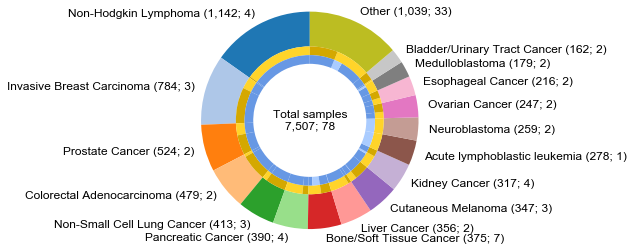

In [15]:
# Plot
fig = plt.figure(figsize=(4, 4))
ax = plt.subplot2grid((1, 1), (0, 0))
size = 0.4
radius = 1.25

ax.pie(
    ring1, 
    radius=radius, 
    colors=ring1_colors, 
    startangle=90,
    wedgeprops=dict(width=size), 
    labels=labels, 
    textprops={'fontsize': 12}
)
ax.pie(
    ring2, 
    radius=radius-size, 
    colors=ring2_colors, 
    startangle=90,
    wedgeprops=dict(width=size/4), 
)
ax.pie(
    ring3, 
    radius=radius-size-size/4, 
    colors=ring3_colors, 
    startangle=90,
    wedgeprops=dict(width=size/4), 
)

ax.text(
    0.5, 0.5, 
    f'Total samples\n{total_samples:,}; {total_cohorts:,}', 
    horizontalalignment='center', 
    verticalalignment='center', 
    transform=ax.transAxes, 
    fontsize=12
)

for extension in ['png']: 
    output = f'./fig_1B.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)

## Panel 1C

In [16]:
# Load data to draw the pie chart
labels = []
ring1 = []
ring1_colors = []
ring2 = []
ring2_colors = []

total_samples = 0
total_cohorts = 0
for stage in ['Primary', 'Metastasis']: 
    stagedata = cohort_df.loc[cohort_df['TYPE'] == stage]
    stagesamples = sum(stagedata['SAMPLES'])
    stagecohorts = len(stagedata['COHORT'])
    labels.append(f'{stage} ({stagesamples:,}; {stagecohorts:,})')
    ring1.append(stagecohorts)
    ring1_colors.append(color_data[stage])
    total_samples += stagesamples
    total_cohorts += stagecohorts
    for age in ['Adult', 'Pediatric']: 
        agedata = stagedata.loc[stagedata['AGE'] == age]
        agesamples = len(agedata['COHORT'])
        ring2.append(agesamples)
        ring2_colors.append(color_data[age])

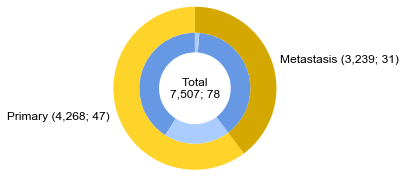

In [17]:
# Plot 
fig = plt.figure(figsize=(3, 3))
ax = plt.subplot2grid((1, 1), (0, 0))
size = 0.4


ax.pie(
    ring1, 
    radius=1.25, 
    colors=ring1_colors, 
    startangle=90,
    wedgeprops=dict(width=size), 
    labels=labels, 
    textprops={'fontsize': 12}
)
ax.pie(
    ring2, 
    radius=1.25-size, 
    colors=ring2_colors, 
    startangle=90,
    wedgeprops=dict(width=size-0.1), 
)


ax.text(
    0.5, 0.5, 
    f'Total\n{total_samples:,}; {total_cohorts:,}', 
    horizontalalignment='center', 
    verticalalignment='center', 
    transform=ax.transAxes,
    fontsize=12
)

for extension in ['png']: 
    output = f'./fig_1C.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)